In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import dataset
import torch
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

In [3]:
transform = transforms.Compose([
    # to-tensor
    transforms.ToTensor(),
    # resize
    transforms.Resize(128),
    # center-crop
    transforms.CenterCrop(128),
    # normalize
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
])

In [4]:
incidents = dataset.IncidentsDataset("Incidents-subset", transform=transform)

In [5]:
train_indices, test_indices, _, _ = train_test_split(range(incidents.__len__()), incidents.targets, stratify=incidents.targets, test_size=.3)

In [6]:
len(train_indices), len(test_indices), incidents.__len__()

(4848, 2079, 6927)

In [7]:
batch_size = 32

train_split = Subset(incidents, train_indices)
test_split = Subset(incidents, test_indices)

train_loader = DataLoader(train_split, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_split, batch_size=batch_size)


In [8]:
dataloader = DataLoader(incidents, batch_size=batch_size, shuffle=True)

In [9]:
nSamples = incidents.__len__()
nClasses = len(incidents.labels)
imgShape = incidents.__getitem__(0)[0].shape

print("Number of samples: ", nSamples)
print("Number of classes: ", nClasses)
print("Shape of an image: ", imgShape)

Number of samples:  6927
Number of classes:  12
Shape of an image:  torch.Size([3, 128, 128])


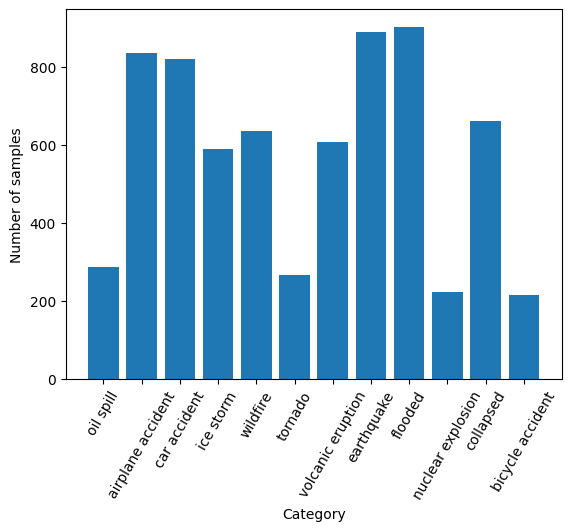

In [10]:
target, counts = np.unique(incidents.targets, return_counts=True)

_, ax = plt.subplots()

ax.bar(incidents.labels[target], counts) #, width=1, edgecolor="white", linewidth=.7)
plt.ylabel("Number of samples")
plt.xlabel("Category")
plt.xticks(rotation=60)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

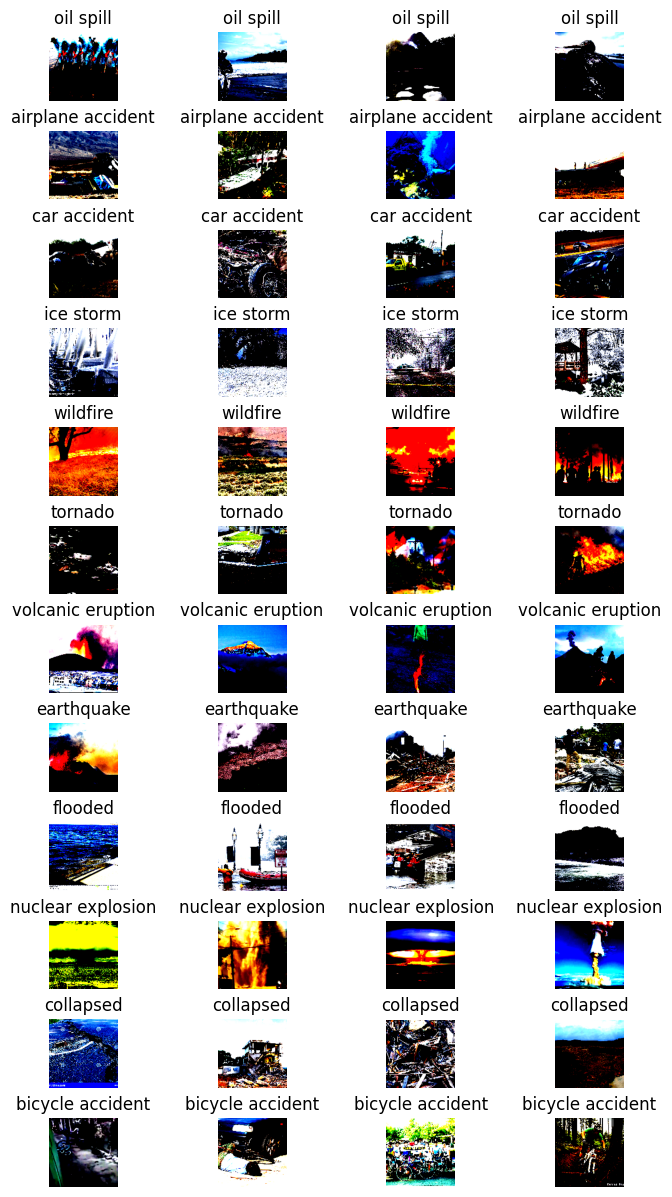

In [11]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(nClasses, 4), axes_pad=(1, .3))

images = []

for n in np.arange(nClasses):
    for i in range(4):
        img = incidents.get_item_with_target(n, i)
        idx = n*4+i
        grid[idx].imshow(img.permute(1, 2, 0))
        grid[idx].set_title(incidents.labels[n])
        grid[idx].axis('off')

In [13]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
model = model.to(device)
model.fc = nn.Linear(2048, nClasses)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [14]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
# start=time.time()
# epochs = 1
# model.train()  # Put the network in train mode

# for epoch in range(0,epochs):

#   for i, (x_batch, y_batch) in enumerate(train_loader):
#     x_batch = x_batch.to(device)  # Move the data to the device that is used
#     y_batch = y_batch.type(torch.LongTensor) # <---- Here (casting)
#     y_batch = y_batch.to(device)
    
#     # Compute prediction and loss
#     y_pred = model(x_batch)
#     loss = criterion(y_pred, y_batch)

#     # Backpropagation
#     optimizer.zero_grad()  # Set all currenly stored gradients to zero 
#     loss.backward()
#     optimizer.step()

#     # Compute relevant metrics
#     y_pred_max = torch.argmax(y_pred, dim=1)  # Get the labels with highest output probability
#     correct = torch.sum(torch.eq(y_pred_max, y_batch)).item()  # Count how many are equal to the true labels
#     elapsed = time.time() - start  # Keep track of how much time has elapsed

#     # Show progress every 20 batches 
#     if not i % 20:
#       print(f'epoch: {epoch}, time: {elapsed:.3f}s, loss: {loss.item():.3f}, train accuracy: {correct / batch_size:.3f}')

      
    

In [16]:
start=time.time()
epochs = 1

for epoch in range(0,epochs):

  model.train()  # Put the network in train mode
  for i, (x_batch, y_batch) in enumerate(train_loader):
    x_batch = x_batch.to(device)  # Move the data to the device that is used
    y_batch = y_batch.type(torch.LongTensor) # <---- Here (casting)
    y_batch = y_batch.to(device)
        
    # Compute prediction and loss
    y_pred = model(x_batch)
    loss = criterion(y_pred, y_batch)

    # Backpropagation
    optimizer.zero_grad()  # Set all currenly stored gradients to zero 
    loss.backward()
    optimizer.step()

    # Compute relevant metrics
    y_pred_max = torch.argmax(y_pred, dim=1)  # Get the labels with highest output probability
    correct = torch.sum(torch.eq(y_pred_max, y_batch)).item()  # Count how many are equal to the true labels
    elapsed = time.time() - start  # Keep track of how much time has elapsed

    # Show progress every 20 batches 
    if not i % 20:
      print(f'epoch: {epoch}, time: {elapsed:.3f}s, loss: {loss.item():.3f}, train accuracy: {correct / batch_size:.3f}')
    
    correct_total = 0

  model.eval()  # Put the network in eval mode
  for i, (x_batch, y_batch) in enumerate(test_loader):
    x_batch = x_batch.to(device)  # Move the data to the device that is used
    y_batch = y_batch.type(torch.LongTensor) # <---- Here (casting)
    y_batch = y_batch.to(device)

    y_pred = model(x_batch)
    y_pred_max = torch.argmax(y_pred, dim=1)

    correct_total += torch.sum(torch.eq(y_pred_max, y_batch)).item()

  print(f'Accuracy on the test set: {correct_total / len(test_split):.3f}')

epoch: 0, time: 4.354s, loss: 3.959, train accuracy: 0.094
epoch: 0, time: 85.142s, loss: 2.299, train accuracy: 0.219
epoch: 0, time: 168.726s, loss: 2.232, train accuracy: 0.281
epoch: 0, time: 249.433s, loss: 2.738, train accuracy: 0.219
epoch: 0, time: 323.114s, loss: 1.995, train accuracy: 0.281
epoch: 0, time: 394.351s, loss: 2.532, train accuracy: 0.219
epoch: 0, time: 476.679s, loss: 1.827, train accuracy: 0.375
epoch: 0, time: 553.689s, loss: 1.405, train accuracy: 0.375
Accuracy on the test set: 0.330


In [17]:
correct = 0
total = 0
model.eval()  # Put the network in evaluation mode
predictions = []
ground_truth = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        ground_truth.append(labels.numpy())
        images = images.to(device)  # Move the data to the device that is used
        labels = labels.type(torch.LongTensor) # <---- Here (casting)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total}%')

Accuracy of the network on the test images: 33%


In [18]:
ground_truth = np.concatenate(ground_truth)
predictions = np.concatenate(predictions)

accuracy = metrics.accuracy_score(ground_truth, predictions)
f1 = metrics.f1_score(ground_truth, predictions, average='weighted')
precision = metrics.precision_score(ground_truth, predictions, average='weighted')
recall = metrics.recall_score(ground_truth, predictions, average='weighted')

print(f'Accuracy: {accuracy*100:.2f}')
print(f'F1: {f1*100:.2f}')
print(f'Precision: {precision*100:.2f}')
print(f'Recall: {recall*100:.2f}')

Accuracy: 33.04
F1: 28.28
Precision: 36.25
Recall: 33.04


/Users/kjwdamme/opt/anaconda3/envs/Data-Science/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix = metrics.confusion_matrix(ground_truth, predictions)
print(confusion_matrix)

[[112   0   2  19  58  39   2   0   0   9   7   2]
 [ 18   0   7   5  15  15   2   1   0   0   1   0]
 [ 55   0  49  47  37  34   1   1   0   1  21   0]
 [ 26   0   1  34 111  17   2   0   0   2   4   2]
 [ 20   0   2  32 169  33   4   2   0   2   2   0]
 [ 49   0   0  31  28 142   8   0   0   9   3   1]
 [ 17   0   5   6  36  28  68   0   1   8   7   1]
 [ 15   0   2   2   1   1   3   8   0   7  18  10]
 [ 14   0   1   7  18  13   3   0   1   5  23   1]
 [  7   0   0   0   0   2   0   0   0  56  13   2]
 [ 14   0   1   2   8   6   3  10   0  32  97   9]
 [ 24   0   0  12   6   4   0  36   0  15  35  59]]


### Cross-Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def train_function(epochs=1, train_loader=None):
    start=time.time()
    model.train()  # Put the network in train mode

    for epoch in range(0,epochs):

        for i, (x_batch, y_batch) in enumerate(train_loader):
            x_batch = x_batch.to(device)  # Move the data to the device that is used
            y_batch = y_batch.type(torch.LongTensor) # <---- Here (casting)
            y_batch = y_batch.to(device)
            
            # Compute prediction and loss
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)

            # Backpropagation
            optimizer.zero_grad()  # Set all currenly stored gradients to zero 
            loss.backward()
            optimizer.step()

            # Compute relevant metrics
            y_pred_max = torch.argmax(y_pred, dim=1)  # Get the labels with highest output probability
            correct = torch.sum(torch.eq(y_pred_max, y_batch)).item()  # Count how many are equal to the true labels
            elapsed = time.time() - start  # Keep track of how much time has elapsed

            # Show progress every 20 batches 
            if not i % 20:
                print(f'epoch: {epoch}, time: {elapsed:.3f}s, loss: {loss.item():.3f}, train accuracy: {correct / batch_size:.3f}')
        

In [ ]:
def test_function(test_loader=None):
    correct = 0
    total = 0
    model.eval()  # Put the network in evaluation mode
    predictions = []
    ground_truth = []
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            ground_truth.append(labels.numpy())
            images = images.to(device)  # Move the data to the device that is used
            labels = labels.type(torch.LongTensor) # <---- Here (casting)
            labels = labels.to(device)
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            predictions.append(predicted.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (100 * correct // total)

In [ ]:
split = 5
kfold = KFold(n_splits=split, shuffle=True)
accuracies = []

for train, test in kfold.split(incidents):
    #train and test are indices
    print("TRAIN:", train, "TEST:", test)
    print(len(train), len(test))

    train_split = Subset(incidents, train)
    test_split = Subset(incidents, test)

    train_loader = DataLoader(train_split, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_split, batch_size=batch_size)

    train_function(epochs=1, train_loader=train_loader)
    accuracy = test_function(test_loader=test_loader)
    accuracies.append(accuracy)
    print(f'Accuracy of the network on the test images: {accuracy}%')

TRAIN: [   0    1    2 ... 6923 6925 6926] TEST: [   5    8   23 ... 6921 6922 6924]
5541 1386
epoch: 0, time: 2.521s, loss: 2.031, train accuracy: 0.281
epoch: 0, time: 34.032s, loss: 1.812, train accuracy: 0.344
epoch: 0, time: 76.408s, loss: 1.798, train accuracy: 0.469
epoch: 0, time: 107.227s, loss: 1.899, train accuracy: 0.406
epoch: 0, time: 139.042s, loss: 1.665, train accuracy: 0.344
epoch: 0, time: 168.461s, loss: 1.918, train accuracy: 0.281
epoch: 0, time: 201.520s, loss: 1.591, train accuracy: 0.531
epoch: 0, time: 230.259s, loss: 2.134, train accuracy: 0.438
epoch: 0, time: 264.709s, loss: 1.619, train accuracy: 0.500
Accuracy of the network on the test images: 36%
TRAIN: [   0    1    2 ... 6924 6925 6926] TEST: [  10   15   16 ... 6918 6920 6923]
5541 1386
epoch: 0, time: 1.375s, loss: 1.363, train accuracy: 0.469
epoch: 0, time: 34.774s, loss: 1.676, train accuracy: 0.469
epoch: 0, time: 60.920s, loss: 2.039, train accuracy: 0.312
epoch: 0, time: 90.037s, loss: 1.685, 

In [ ]:
print(f'Average accuracy: {np.mean(accuracies)}')